In [1]:
from astropy.table import Table,QTable,Column,vstack,hstack
import numpy as np
import astropy.units as u
from math import log10, floor
import pdb
import astropy.constants as c
from astropy.io import fits
import warnings
from astropy.wcs import WCS
from radio_beam import Beam, Beams
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from sigfig import round as siground
from scipy.integrate import quad
from sigfig import round as siground

Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources for the robust catalog
Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources

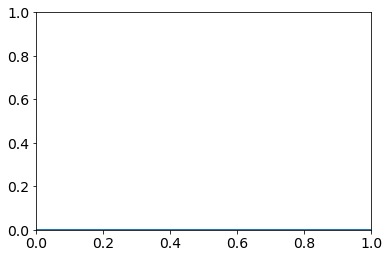

Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources for the robust catalog
Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources

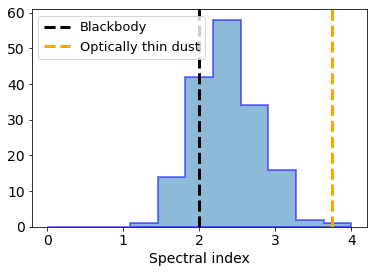

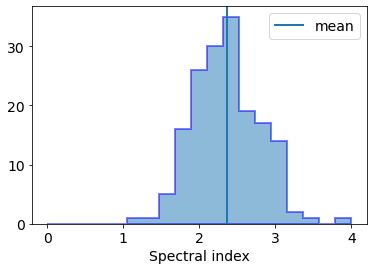

Number of matched sources: 101
Number of source rejected based on SNR minumum: 23
Number of matched sources: 67
Number of source rejected based on SNR minumum: 21
Number of matched sources: 101
Number of source rejected based on SNR minumum: 23
Number of matched sources: 67
Number of source rejected based on SNR minumum: 21
Number of matched sources: 101
Number of source rejected based on SNR minumum: 0
Number of matched sources: 67
Number of source rejected based on SNR minumum: 0


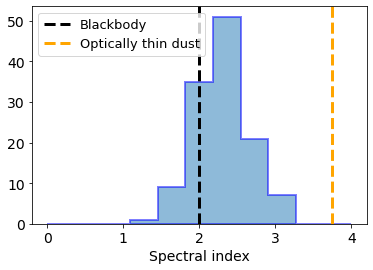

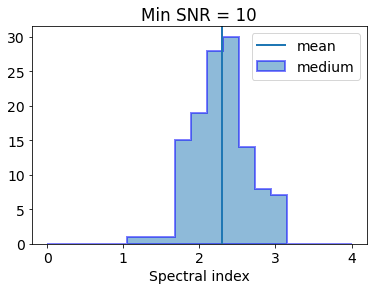

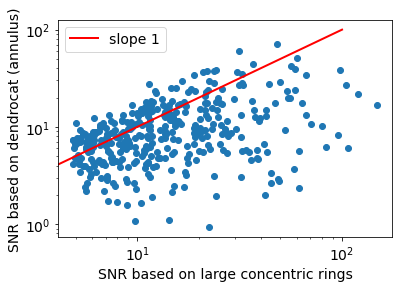

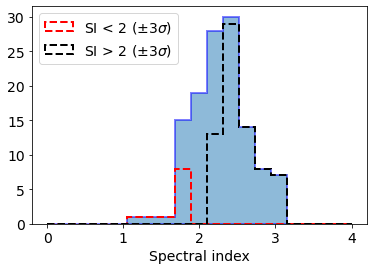

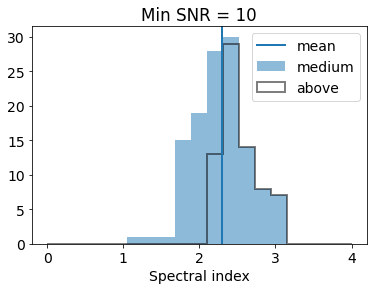

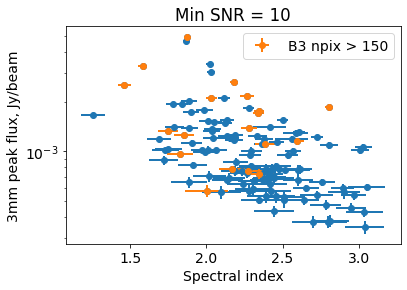

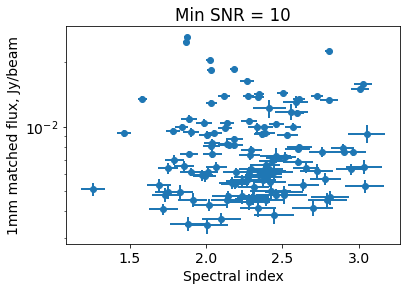

No handles with labels found to put in legend.


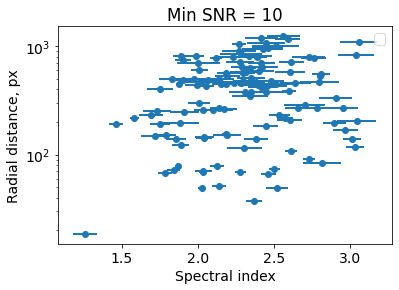

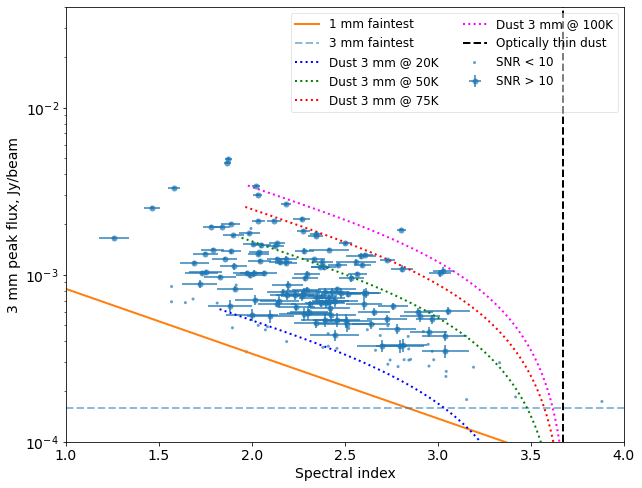

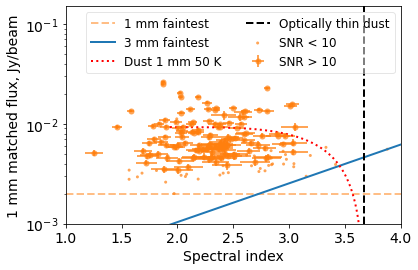

0.00015856522077228874
0.0002453920606058091
0.00015856522077228874


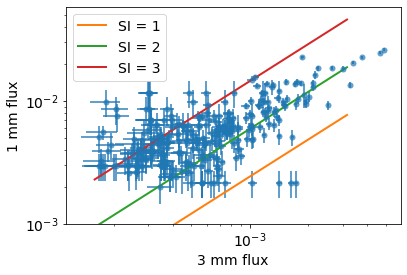

0.00012617382906393866
0.0002026501861300081
1 3.259 6 10
7 3.183 20 32
9 3.454 14 29
12 2.303 12 8
15 1.9 26 13
16 1.959 23 12
18 3.406 9 18
19 3.022 19 27
21 3.729 4 10
22 2.282 14 10
27 2.273 9 6
28 1.727 17 8
1 3.259 6 10
7 3.183 20 32
9 3.454 14 29
12 2.303 12 8
15 1.9 26 13
16 1.959 23 12
18 3.406 9 18
19 3.022 19 27
21 3.729 4 10
22 2.282 14 10
27 2.273 9 6
28 1.727 17 8
14 2.349 35 12
15 1.458 48 8
17 2.18 47 14
213 2.501 36 14
0.00039499590639024973
0.0020031111780554056
0.0010291660437360406
0.0012846130412071943
0.0011931817280128598
0.0013529775897040963
0.00017430329171475023
0.00026367558166384697
0.00012617382906393866
0.0002026501861300081


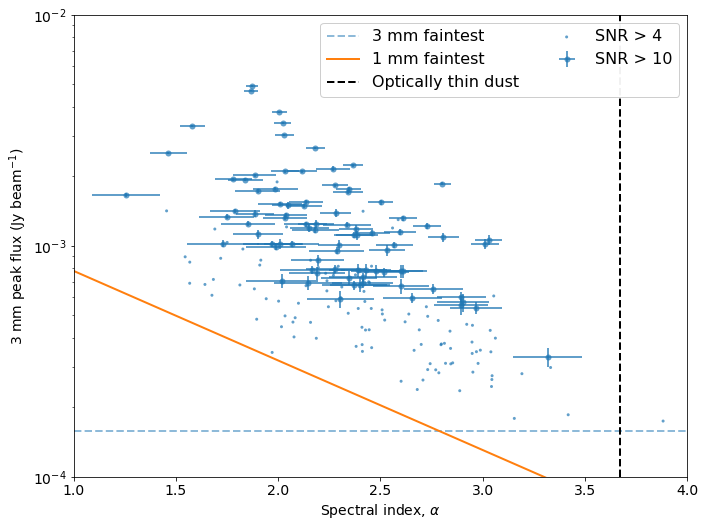

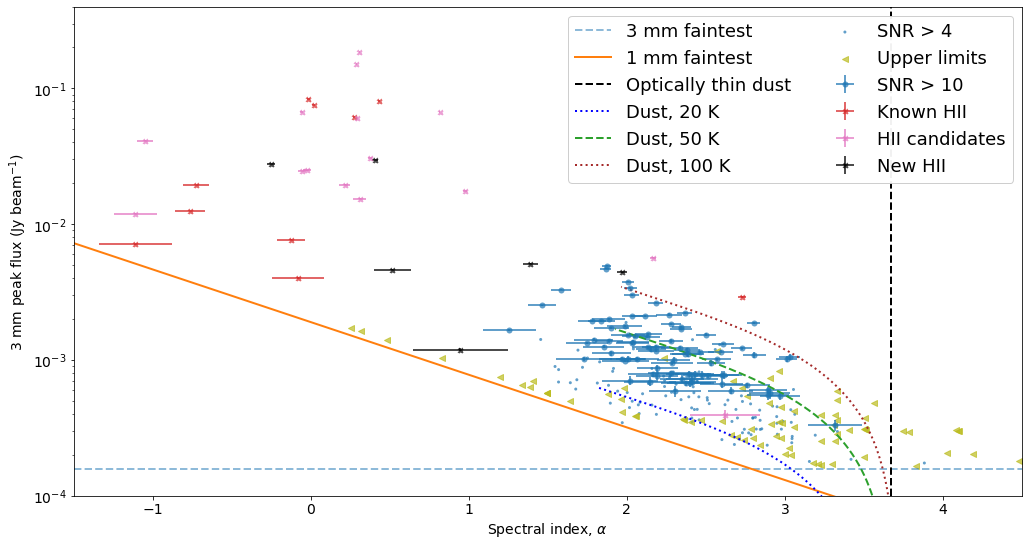

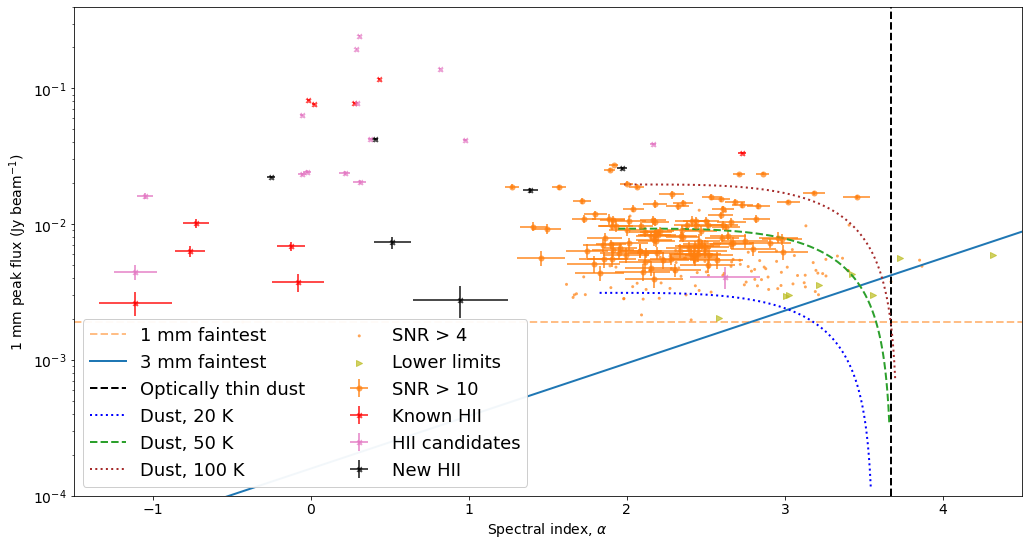

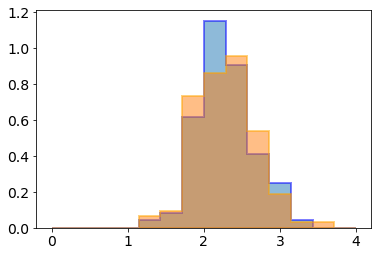

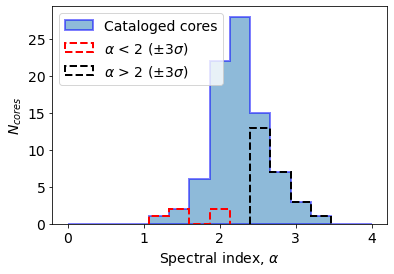

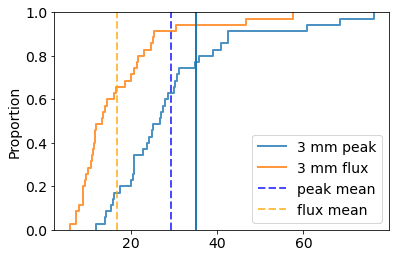

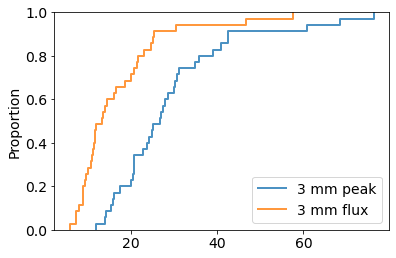

In [2]:
%run Spectral_indexes.ipynb

In [3]:
base = '/orange/adamginsburg/sgrb2/NB/catalog_the_end/'
catNB3 = Table.read(base+'catalog_NB3_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catMB3 = Table.read(base+'catalog_MB3_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catNB6 = Table.read(base+'catalog_NB6_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
catMB6 = Table.read(base+'catalog_MB6_4RMS_30.0rings_0.7mindelta3npix_final_Nazar_review.csv', format='ascii')
from purify_catalog import cat_purification

In [4]:
base = '/orange/adamginsburg/sgrb2/NB/catalog/'
lowres = Table.read(base+'lowres_cat.txt', format='ipac')

In [5]:
def transpose_table(tab_before, id_col_name='Core'):#source: https://gist.github.com/PBarmby/61c6addda169568f4a0d
    '''Returns a copy of tab_before (an astropy.Table) with rows and columns interchanged
        id_col_name: name for optional ID column corresponding to
        the column names of tab_before'''
    # contents of the first column of the old table provide column names for the new table
    # TBD: check for duplicates in new_colnames & resolve
    new_colnames=tuple(tab_before[tab_before.colnames[0]])
    # remaining columns of old table are row IDs for new table 
    new_rownames=tab_before.colnames[1:]
    # make a new, empty table
    tab_after=QTable(names=new_colnames)
    # add the columns of the old table as rows of the new table
    for r in new_rownames:
        tab_after.add_row(tab_before[r])
    if id_col_name != '':
        # add the column headers of the old table as the id column of new table
        tab_after.add_column(Column(new_rownames, name=id_col_name),index=0)
    return tab_after

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x))))) 


In [6]:
# Thigns I should include in the displayed catalog:
# brightness temperature
# spectral index and error
# mass

In [7]:
def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)

In [8]:
T = 50 * u.K
d = 8.4 * u.kpc
B3freq = 92.45* u.GHz
B6freq = 225.78 * u.GHz

kappaB3 = kappa(B3freq)
kappaB6 = kappa(B6freq)

In [9]:
def gaussian(x, x0=0, width=1):
    return np.exp(-(x-x0)**2/(2*width**2))

def apperture_corr(cat):
    true = quad(gaussian, -np.inf, np.inf)[0]
    adjusted_flux_array = []
    for core in cat:
        min_value = core['ring_std'] * 4 # multiplying by 4 beacause the min_value was set to 4 sigma
        peak_flux = core['peak']
        a = min_value / peak_flux
        crop = np.sqrt(-2*np.log(a))
        ratio_true_obs = true / (quad(gaussian, -crop, crop)[0])
        
        adjusted_flux = core['flux'] * ratio_true_obs
        
        adjusted_flux_array += [adjusted_flux]
        
    return adjusted_flux_array

In [10]:
def get_mass(flux, freq):
    return (flux*u.Jy * d**2 *(c.c**2)/ (2*kappa(freq)*freq**2*c.k_B*T)).to(u.Msun)
# this calculates the masses prior to aperture correction 
# mass_NB3_total = get_mass(catNB3_m['flux'].value, B3freq)
# mass_MB3_total = get_mass(catMB3_m['flux'].value, B3freq)
# mass_NB6_total = get_mass(catNB6_m['flux'].value, B6freq)
# mass_MB6_total = get_mass(catMB6_m['flux'].value, B6freq)

In [11]:
from purify_catalog import HII_catalogs, cat_purification_cores
catNB3_m, catMB3_m, catNB6_m,catMB6_m = cat_purification_cores(catNB3, catMB3, catNB6, catMB6)
catNB3_HII, catNB3_HII_cand, catNB3_HII_new, catMB3_HII, catMB3_HII_cand, catMB3_HII_new, catNB6_HII, catNB6_HII_cand, catNB6_HII_new, catMB6_HII, catMB6_HII_cand, catMB6_HII_newI = HII_catalogs(catNB3, catNB6, catMB3, catMB6)

Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources for the robust catalog
Band 3: 176, Band 6: 250
Band 3: 211, Band 6: 265
Band 3: 213, Band 6: 274
Band 3: 119, Band 6: 186
[75, 82, 86]
[16]


In [12]:
SI_NB3, SI_err_NB3 = SIs_from_catalogs('B3', catNB3_m, dataNB3, wcsNB3, catNB6_m, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB3, SI_err_MB3 = SIs_from_catalogs('B3', catMB3_m, dataMB3, wcsMB3, catMB6_m, dataMB6_conv, wcsMB6, dataMB6_old,  'M')
SI_NB6, SI_err_NB6 = SIs_from_catalogs('B6', catNB3_m, dataNB3, wcsNB3, catNB6_m, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB6, SI_err_MB6 = SIs_from_catalogs('B6', catMB3_m, dataMB3, wcsMB3, catMB6_m, dataMB6_conv, wcsMB6, dataMB6_old,  'M')


SI_NB3_HII, SI_err_NB3_HII = SIs_from_catalogs('B3', catNB3_HII, dataNB3, wcsNB3, catNB6_HII, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB3_HII, SI_err_MB3_HII = SIs_from_catalogs('B3', catMB3_HII, dataMB3, wcsMB3, catMB6_HII, dataMB6_conv, wcsMB6, dataMB6_old,  'M')
#SI_NB6_HII, SI_err_NB6_HII = SIs_from_catalogs('B6', catNB3_HII, dataNB3, wcsNB3, catNB6_HII, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB6_HII, SI_err_MB6_HII = SIs_from_catalogs('B6', catMB3_HII, dataMB3, wcsMB3, catMB6_HII, dataMB6_conv, wcsMB6, dataMB6_old,  'M')


SI_NB3_HII_cand, SI_err_NB3_HII_cand = SIs_from_catalogs('B3', catNB3_HII_cand, dataNB3, wcsNB3, catNB6_HII_cand, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB3_HII_cand, SI_err_MB3_HII_cand = SIs_from_catalogs('B3', catMB3_HII_cand, dataMB3, wcsMB3, catMB6_HII_cand, dataMB6_conv, wcsMB6, dataMB6_old,  'M')
SI_NB6_HII_cand, SI_err_NB6_HII_cand = SIs_from_catalogs('B6', catNB3_HII_cand, dataNB3, wcsNB3, catNB6_HII_cand, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB6_HII_cand, SI_err_MB6_HII_cand = SIs_from_catalogs('B6', catMB3_HII_cand, dataMB3, wcsMB3, catMB6_HII_cand, dataMB6_conv, wcsMB6, dataMB6_old,  'M')


SI_NB3_HII_new, SI_err_NB3_HII_new = SIs_from_catalogs('B3', catNB3_HII_new, dataNB3, wcsNB3, catNB6_HII_new, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB3_HII_new, SI_err_MB3_HII_new = SIs_from_catalogs('B3', catMB3_HII_new, dataMB3, wcsMB3, catMB6_HII_new, dataMB6_conv, wcsMB6, dataMB6_old,  'M')
SI_NB6_HII_new, SI_err_NB6_HII_new = SIs_from_catalogs('B6', catNB3_HII_new, dataNB3, wcsNB3, catNB6_HII_new, dataNB6_conv, wcsNB6, dataNB6_old,  'N')
SI_MB6_HII_new, SI_err_MB6_HII_new = SIs_from_catalogs('B6', catMB3_HII_new, dataMB3, wcsMB3, catMB6_HII_new, dataMB6_conv, wcsMB6, dataMB6_old,  'M')

0.00015856522077228874
0.0002453920606058091
0.00012617382906393866
0.0002026501861300081
0.0010291660437360406
0.0012846130412071943
0.002579181
0.00039499590639024973
0.0020031111780554056
0.00039202685
0.005646818
0.0011931817280128598
0.0013529775897040963
0.0011771576
0.027837059


In [13]:
base = '/orange/adamginsburg/sgrb2/NB/the_end/'
pathNB3 = base+'sgr_b2.N.B3.cont.r0.5.1m0.075mJy.cal2.image.tt0.pbcor.fits'
pathMB3 = base+'sgr_b2.M.B3.cont.r0.5.1m0.125mJy.cal3.image.tt0.pbcor.fits'
pathNB6 = base+'sgr_b2.N.B6.cont.r0.5.1m1.5mJy.cal4.image.tt0.pbcor.fits'
pathMB6 = base+'sgr_b2.M.B6.cont.r0.5.1m0.68mJy.cal3.image.tt0.pbcor.fits'

pathNB6_conv = base+'sgr_b2.N.B6.cont.r0.5.1m1.5mJy.cal4.image.tt0.pbcor_convolvedB3_adj_fix.fits'
pathMB6_conv = base+'sgr_b2.M.B6.cont.r0.5.1m0.68mJy.cal3.image.tt0.pbcor_convolvedB3_adj_fix.fits'

In [14]:
def read_in(path):
    """
    Simplify reading in the files.
    """
    fh=fits.open(path)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        wcs = WCS(fh[0].header)
        hdr = fh[0].header
    datas=fh[0].data #
    return datas, wcs, hdr

In [15]:
# read in the data, wcs, and the header
dataNB3, wcsNB3, hdrNB3 = read_in(pathNB3)
dataMB3, wcsMB3, hdrMB3 = read_in(pathMB3)
dataNB6, wcsNB6, hdrNB6 = read_in(pathNB6)
dataMB6, wcsMB6, hdrMB6 = read_in(pathMB6)
# get the beam from the header
my_beamNB3 = Beam.from_fits_header(hdrNB3)
my_beamMB3 = Beam.from_fits_header(hdrMB3)
my_beamNB6 = Beam.from_fits_header(hdrNB6)
my_beamMB6 = Beam.from_fits_header(hdrMB6)

In [16]:
equivB3 = u.brightness_temperature(B3freq)
equivB6 = u.brightness_temperature(B6freq)
beam_area_NB3 = my_beamNB3.sr
beam_area_MB3 = my_beamMB3.sr
beam_area_NB6 = my_beamNB6.sr
beam_area_MB6 = my_beamMB6.sr

In [17]:
# catNB3_c, catNB3_m, catNB3_r = cat_purification(catNB3)
# catMB3_c, catMB3_m, catMB3_r = cat_purification(catMB3)
# catNB6_c, catNB6_m, catNB6_r = cat_purification(catNB6)
# catMB6_c, catMB6_m, catMB6_r = cat_purification(catMB6)

In [18]:
T_B_NB3_peak = (catNB3_m['peak']*u.beam/beam_area_NB3).to(u.K, equivalencies=equivB3)
T_B_MB3_peak = (catMB3_m['peak']*u.beam/beam_area_MB3).to(u.K, equivalencies=equivB3)
T_B_NB6_peak = (catNB6_m['peak']*u.beam/beam_area_NB6).to(u.K, equivalencies=equivB6)
T_B_MB6_peak = (catMB6_m['peak']*u.beam/beam_area_MB6).to(u.K, equivalencies=equivB6)


T_B_NB3_peak_HII = (catNB3_HII['peak']*u.beam/beam_area_NB3).to(u.K, equivalencies=equivB3)
T_B_MB3_peak_HII = (catMB3_HII['peak']*u.beam/beam_area_MB3).to(u.K, equivalencies=equivB3)
T_B_NB6_peak_HII = (catNB6_HII['peak']*u.beam/beam_area_NB6).to(u.K, equivalencies=equivB6)
T_B_MB6_peak_HII = (catMB6_HII['peak']*u.beam/beam_area_MB6).to(u.K, equivalencies=equivB6)


T_B_NB3_peak_HII_cand = (catNB3_HII_cand['peak']*u.beam/beam_area_NB3).to(u.K, equivalencies=equivB3)
T_B_MB3_peak_HII_cand = (catMB3_HII_cand['peak']*u.beam/beam_area_MB3).to(u.K, equivalencies=equivB3)
T_B_NB6_peak_HII_cand = (catNB6_HII_cand['peak']*u.beam/beam_area_NB6).to(u.K, equivalencies=equivB6)
T_B_MB6_peak_HII_cand = (catMB6_HII_cand['peak']*u.beam/beam_area_MB6).to(u.K, equivalencies=equivB6)


T_B_NB3_peak_HII_new = (catNB3_HII_new['peak']*u.beam/beam_area_NB3).to(u.K, equivalencies=equivB3)
T_B_MB3_peak_HII_new = (catMB3_HII_new['peak']*u.beam/beam_area_MB3).to(u.K, equivalencies=equivB3)
T_B_NB6_peak_HII_new = (catNB6_HII_new['peak']*u.beam/beam_area_NB6).to(u.K, equivalencies=equivB6)
T_B_MB6_peak_HII_new = (catMB6_HII_new['peak']*u.beam/beam_area_MB6).to(u.K, equivalencies=equivB6)

#T_B_B3_peak = np.concatenate([T_B_NB3_peak, T_B_MB3_peak]).value
#T_B_B6_peak = np.concatenate([T_B_NB6_peak, T_B_MB6_peak]).value

In [19]:
# T_B_NB3_flux = (catNB3_m['flux']/((catNB3_m['area_exact']/beam_area_NB3).to(u.dimensionless_unscaled))/beam_area_NB3).to(u.K, equivalencies=equivB3)
# T_B_MB3_flux = (catMB3_m['flux']/((catMB3_m['area_exact']/beam_area_MB3).to(u.dimensionless_unscaled))/beam_area_MB3).to(u.K, equivalencies=equivB3)
# T_B_NB6_flux = (catNB6_m['flux']/((catNB6_m['area_exact']/beam_area_NB6).to(u.dimensionless_unscaled))/beam_area_NB6).to(u.K, equivalencies=equivB6)
# T_B_MB6_flux = (catMB6_m['flux']/((catMB6_m['area_exact']/beam_area_MB6).to(u.dimensionless_unscaled))/beam_area_MB6).to(u.K, equivalencies=equivB6)
# T_B_B3_flux = np.concatenate([T_B_NB3_flux, T_B_MB3_flux]).value
# T_B_B6_flux = np.concatenate([T_B_NB6_flux, T_B_MB6_flux]).value

In [20]:
mass_NB3_total = get_mass(apperture_corr(catNB3_m), B3freq)
mass_MB3_total = get_mass(apperture_corr(catMB3_m), B3freq)
mass_NB6_total = get_mass(apperture_corr(catNB6_m), B6freq)
mass_MB6_total = get_mass(apperture_corr(catMB6_m), B6freq)

In [21]:
for i in range(len(catNB6_m)):
    B3_name = catNB6_m['B3_match'][i]
    if B3_name in cat_NB3_HII_candidates['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catNB6_m['_name'][i])+' candidates')
    if B3_name in cat_NB3_HII['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catNB6_m['_name'][i])+' old')
    if B3_name in cat_NB3_HII_new['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catNB6_m['_name'][i])+' new')

In [22]:
for i in range(len(catMB6_m)):
    B3_name = catMB6_m['B3_match'][i]
    if B3_name in cat_MB3_HII_candidates['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catMB6_m['_name'][i])+' candidates')
    if B3_name in cat_MB3_HII['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catMB6_m['_name'][i])+' old')
    if B3_name in cat_MB3_HII_new['_name']:
        print('Band 3: '+str(B3_name)+', Band 6: '+str(catMB6_m['_name'][i])+' new')

In [23]:
# def remove_HII_cores(catB3_HII_array, catB6):
#     list_of_rows_to_remove = []
#     for i in range(len(catB6)):
#         B3_name = catB6['B3_match'][i]
#         for catB3 in catB3_HII_array:
#             if B3_name in catB3['_name']:
#                 print('Band 3: '+str(B3_name)+', Band 6: '+str(catB6['_name'][i]))
#                 list_of_rows_to_remove += [i]
#     return list_of_rows_to_remove

In [24]:
# catNB6_m.remove_rows([75,82,86])

In [25]:
# remove_HII_cores([catNB3_HII_cand,catNB3_HII,catNB3_HII_new], catNB6_m)

In [26]:
# remove_HII_cores([catMB3_HII_cand,catMB3_HII,catMB3_HII_new], catMB6_m)

In [27]:
# 30 candidates -> new.
# 167 candidates -> 

In [81]:
from purify_catalog import HII_catalogs, cat_purification_cores
catNB3_m, catMB3_m, catNB6_m,catMB6_m = cat_purification_cores(catNB3, catMB3, catNB6, catMB6)
catNB3_HII, catNB3_HII_cand, catNB3_HII_new, catMB3_HII, catMB3_HII_cand, catMB3_HII_new, catNB6_HII, catNB6_HII_cand, catNB6_HII_new, catMB6_HII, catMB6_HII_cand, catMB6_HII_new = HII_catalogs(catNB3, catNB6, catMB3, catMB6)

Removed 198 sources for the complete catalog
Removed 9 sources for the medium catalog
Removed 81 sources for the robust catalog
Removed 186 sources for the complete catalog
Removed 7 sources for the medium catalog
Removed 47 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 6 sources for the medium catalog
Removed 58 sources for the robust catalog
Removed 203 sources for the complete catalog
Removed 8 sources for the medium catalog
Removed 32 sources for the robust catalog
Band 3: 176, Band 6: 250
Band 3: 211, Band 6: 265
Band 3: 213, Band 6: 274
Band 3: 119, Band 6: 186
[75, 82, 86]
[16]


In [67]:
def B6names_for_B3cat(catB3, catB6):
    B6names_forB3cat = []
    for row in catB3:
        name = row['_name']
        if name in catB6['B3_match']:
            B6indx_ofB3match = np.where(catB6['B3_match'] == name)
            B6names_ofB3match = []
            for i in range(len(B6indx_ofB3match)):
                B6names_ofB3match += [catB6['_name'][B6indx_ofB3match][i]]
            B6names_forB3cat += B6names_ofB3match

        else:
            B6names_forB3cat += [np.ma.masked]
            
    return B6names_forB3cat

In [86]:
B6names_for_NB3cat = B6names_for_B3cat(catNB3_m, catNB6_m)
B6names_for_MB3cat = B6names_for_B3cat(catMB3_m, catMB6_m)

B6names_for_NB3cat_HII = B6names_for_B3cat(catNB3_HII, catNB6_HII)
B6names_for_MB3cat_HII = B6names_for_B3cat(catMB3_HII, catMB6_HII)

B6names_for_NB3cat_HII_cand = B6names_for_B3cat(catNB3_HII_cand, catNB6_HII_cand)
B6names_for_MB3cat_HII_cand = B6names_for_B3cat(catMB3_HII_cand, catMB6_HII_cand)

B6names_for_NB3cat_HII_new = B6names_for_B3cat(catNB3_HII_new, catNB6_HII_new)
B6names_for_MB3cat_HII_new = B6names_for_B3cat(catMB3_HII_new, catMB6_HII_new)

In [89]:
catNB3_m.add_column(B6names_for_NB3cat, name = 'Band6 match') # rename to ID_{Band 6}
catMB3_m.add_column(B6names_for_MB3cat, name = 'Band6 match') # rename to ID_{Band 6}

catNB3_HII.add_column(B6names_for_NB3cat_HII, name = 'Band6 match') # rename to ID_{Band 6}
catMB3_HII.add_column(B6names_for_MB3cat_HII, name = 'Band6 match') # rename to ID_{Band 6}

catNB3_HII_cand.add_column(B6names_for_NB3cat_HII_cand, name = 'Band6 match') # rename to ID_{Band 6}
catMB3_HII_cand.add_column(B6names_for_MB3cat_HII_cand, name = 'Band6 match') # rename to ID_{Band 6}

catNB3_HII_new.add_column(B6names_for_NB3cat_HII_new, name = 'Band6 match') # rename to ID_{Band 6}
catMB3_HII_new.add_column(B6names_for_MB3cat_HII_new, name = 'Band6 match') # rename to ID_{Band 6}

In [90]:
column_list_removal = ['_idx', 'c_ID', 'area_ellipse', 'area_exact', 'x_peak_px', 'y_peak_px', 
                      'x_peak', 'y_peak', 'npix', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'x_cen_px', 'y_cen_px',
                      'radial_d_px', 'radial_d_AU', 'rejected', '100.0GHz_snr', 'detection_score', 'Schmiedeke16', 'notes', '225.0GHz_snr']

In [91]:
def create_catalog(cat_m_in, T_peak, SI, SI_err, mass):
    
    cat_m = Table(cat_m_in, masked=True, copy=True)
    
    for i in range(len(column_list_removal)):
        try:
            cat_m.remove_columns([column_list_removal[i]])
        except:
            pass

    # now add the columns

    try:
        cat_m.add_column(T_peak, name='Brightness temperature')
    except:
        pass
    try:
        cat_m.add_column(SI, name = 'Spectral index')
    except:
        pass
    try:
        cat_m.add_column(SI_err, name = 'Spectral index error')
    except:
        pass
    try:
        cat_m.add_column(mass, name = 'Mass')
    except:
        pass
    
    
    
    cat_m['flux'] = cat_m['flux'].to(u.mJy)
    cat_m['peak'] = cat_m['peak'].to(u.mJy/u.beam)
    cat_m['ring_std'] = cat_m['ring_std'].to(u.mJy/u.beam)
    cat_m['major_fwhm'] = cat_m['major_fwhm'].to(u.arcsec)
    cat_m['minor_fwhm'] = cat_m['minor_fwhm'].to(u.arcsec)
    angleNB3_x = []
    angleNB3_y = []
    for i in range(len(cat_m)):
        cat_m['flux'][i] = sigfig_rounding_single(cat_m['flux'][i],cat_m['ring_std'][i])[0]
        cat_m['peak'][i] = sigfig_rounding_single(cat_m['peak'][i],cat_m['ring_std'][i])[0]
        cat_m['ring_std'][i] = round((cat_m['ring_std'][i]), 3)
        cat_m['major_fwhm'][i] = round((cat_m['major_fwhm'][i]), 3)
        cat_m['minor_fwhm'][i] = round((cat_m['minor_fwhm'][i]), 3)
        cat_m['x_cen'][i] = round(cat_m['x_cen'][i], 5)
        cat_m['y_cen'][i] = round(cat_m['y_cen'][i], 5)
        angleNB3_x += [(Angle((cat_m['x_cen'][i]), unit=u.deg)).to_string(unit=u.hour, sep=':')]
        angleNB3_y += [(Angle((cat_m['y_cen'][i]), unit=u.deg)).to_string(unit=u.deg, sep=':')]
        cat_m['Brightness temperature'][i] = int((cat_m['Brightness temperature'][i]))
        if np.isnan(cat_m['Spectral index'][i]):
            cat_m['Spectral index'][i] = np.ma.masked
            cat_m['Spectral index error'][i] = np.ma.masked
            
        else:
            cat_m['Spectral index'][i] = sigfig_rounding_single(cat_m['Spectral index'][i], cat_m['Spectral index error'][i])[0]
            cat_m['Spectral index error'][i] = sigfig_rounding_single(cat_m['Spectral index'][i], cat_m['Spectral index error'][i])[1]
        
        
        
        if not cat_m['Mass'][i] == -99:
            cat_m['Mass'][i] = round((cat_m['Mass'][i]), 1)

    # This is dumb, but better than doing by hand:
    if cat_m['Mass'][0] == -99:
        cat_m['Mass'].mask = len(cat_m)*[True]
    
    
    cat_m['x_cen'] = cat_m['x_cen'].astype(str)
    cat_m['y_cen'] = cat_m['y_cen'].astype(str)
    cat_m['Brightness temperature'] = cat_m['Brightness temperature'].astype(int)
    try:
        cat_m['Band6 match'] = cat_m['Band6 match'].astype(int)
    except:
        pass
    # try:
    #     cat_m['B3_match'] = cat_m['B3_match'].astype(int)
    # except:
    #     pass
    
    for i in range(len(cat_m)):
        cat_m['x_cen'][i] = angleNB3_x[i]
        cat_m['y_cen'][i] = angleNB3_y[i]
        
        
    cat_m.rename_column('_name', 'ID')
    cat_m.rename_column('flux', r'$S_{\nu,flux}$')
    cat_m.rename_column('peak', r'$S_{\nu,peak}$')
    cat_m.rename_column('ring_std', r'$S_{\nu, err}$')
    cat_m.rename_column('major_fwhm', r'FWHM$_{maj}$')
    cat_m.rename_column('minor_fwhm', r'FWHM$_{min}$')
    cat_m.rename_column('x_cen', 'RA (ICRS)')
    cat_m.rename_column('y_cen', 'Dec (ICRS)')
    try:
        cat_m.rename_column('G2018', 'G18')
    except:
        pass
    try:
        cat_m.rename_column('Band6 match', r'ID$_{Band 6}$')
    except:
        pass
    try:
        cat_m.rename_column('B3_match', r'ID$_{Band 3}$')
    except:
        pass
    cat_m.rename_column('core_score', 'Score')
    cat_m.rename_column('Brightness temperature', r'$T_B$')
    cat_m.rename_column('Spectral index', r'$\alpha$')
    cat_m.rename_column('Spectral index error', r'$\alpha_{err}$')
    
    return cat_m

In [92]:
def sigfig_rounding_single(quantity,uncertainty):
    if np.isnan(quantity):
        return np.nan, np.nan
    if hasattr(quantity,'value'):
        unit = quantity.unit
        quantity = quantity.value
        unc = uncertainty.value
    else:
        unit = 1
    q = siground(quantity,uncertainty)
    quantity = np.double(q.split(' ')[0])*unit
    unc = np.double(q.split(' ')[2])*unit
    
    return quantity,unc

In [107]:
catNB3_m_out = create_catalog(catNB3_m, T_B_NB3_peak, SI_NB3, SI_err_NB3, mass_NB3_total)
catMB3_m_out = create_catalog(catMB3_m, T_B_MB3_peak, SI_MB3, SI_err_MB3, mass_MB3_total)
catNB6_m_out = create_catalog(catNB6_m, T_B_NB6_peak, SI_NB6, SI_err_NB6, mass_NB6_total)
catMB6_m_out = create_catalog(catMB6_m, T_B_MB6_peak, SI_MB6, SI_err_MB6, mass_MB6_total)


catNB3_HII_out = create_catalog(catNB3_HII, T_B_NB3_peak_HII, SI_NB3_HII, SI_err_NB3_HII, -99)
catMB3_HII_out = create_catalog(catMB3_HII, T_B_MB3_peak_HII, SI_MB3_HII, SI_err_MB3_HII, -99)
#catNB6_HII_out = create_catalog(catNB6_HII, T_B_NB6_peak_HII, SI_NB6_HII, SI_err_NB6_HII, -99)
catMB6_HII_out = create_catalog(catMB6_HII, T_B_MB6_peak_HII, SI_MB6_HII, SI_err_MB6_HII, -99)

catNB3_HII_cand_out = create_catalog(catNB3_HII_cand, T_B_NB3_peak_HII_cand, SI_NB3_HII_cand, SI_err_NB3_HII_cand, -99)
catMB3_HII_cand_out = create_catalog(catMB3_HII_cand, T_B_MB3_peak_HII_cand, SI_MB3_HII_cand, SI_err_MB3_HII_cand, -99)
catNB6_HII_cand_out = create_catalog(catNB6_HII_cand, T_B_NB6_peak_HII_cand, SI_NB6_HII_cand, SI_err_NB6_HII_cand, -99)
catMB6_HII_cand_out = create_catalog(catMB6_HII_cand, T_B_MB6_peak_HII_cand, SI_MB6_HII_cand, SI_err_MB6_HII_cand, -99)

catNB3_HII_new_out = create_catalog(catNB3_HII_new, T_B_NB3_peak_HII_new, SI_NB3_HII_new, SI_err_NB3_HII_new, -99)
catMB3_HII_new_out = create_catalog(catMB3_HII_new, T_B_MB3_peak_HII_new, SI_MB3_HII_new, SI_err_MB3_HII_new, -99)
catNB6_HII_new_out = create_catalog(catNB6_HII_new, T_B_NB6_peak_HII_new, SI_NB6_HII_new, SI_err_NB6_HII_new, -99)
catMB6_HII_new_out = create_catalog(catMB6_HII_new, T_B_MB6_peak_HII_new, SI_MB6_HII_new, SI_err_MB6_HII_new, -99)

In [108]:
catNB3_m_out.add_column('core',name='Source', index = 9)
catMB3_m_out.add_column('core',name='Source', index = 9)
catNB6_m_out.add_column('core',name='Source', index = 9)
catMB6_m_out.add_column('core',name='Source', index = 9)

catNB3_HII_out.add_column('HII',name='Source', index = 9)
catMB3_HII_out.add_column('HII',name='Source', index = 9)
#catNB6_HII_out
catMB6_HII_out.add_column('HII',name='Source', index = 9)

catNB3_HII_cand_out.add_column('HII_cand',name='Source', index = 9)
catMB3_HII_cand_out.add_column('HII_cand',name='Source', index = 9)
catNB6_HII_cand_out.add_column('HII_cand',name='Source', index = 9)
catMB6_HII_cand_out.add_column('HII_cand',name='Source', index = 9)

catNB3_HII_new_out.add_column('HII_new',name='Source', index = 9)
catMB3_HII_new_out.add_column('HII_new',name='Source', index = 9)
catNB6_HII_new_out.add_column('HII_new',name='Source', index = 9)
catMB6_HII_new_out.add_column('HII_new',name='Source', index = 9)

In [120]:
catNB3_full = vstack([catNB3_m_out,catNB3_HII_out,catNB3_HII_cand_out,catNB3_HII_new_out])
catMB3_full = vstack([catMB3_m_out,catMB3_HII_out,catMB3_HII_cand_out,catMB3_HII_new_out])
catNB6_full = vstack([catNB6_m_out,catNB6_HII_cand_out,catNB6_HII_new_out])
catMB6_full = vstack([catMB6_m_out,catMB6_HII_out,catMB6_HII_cand_out,catMB6_HII_new_out])

catNB3_full.sort('ID')
catMB3_full.sort('ID')
catNB6_full.sort('ID')
catMB6_full.sort('ID')

In [123]:
catNB3_full

ID,"$S_{\nu,flux}$","$S_{\nu,peak}$","$S_{\nu, err}$",FWHM$_{maj}$,FWHM$_{min}$,RA (ICRS),Dec (ICRS),Score,Source,G18,ID$_{Band 6}$,$T_B$,$\alpha$,$\alpha_{err}$,Mass
,mJy,mJy / beam,mJy / beam,arcsec,arcsec,,,,,,,K,,,solMass
int64,float64,float64,float64,float64,float64,str32,str32,int64,str8,str9,int64,int64,float64,float64,float64
1,0.71,0.43,0.032,0.115,0.071,17:47:19.884,-28:22:20.316,2,core,--,--,8,2.4,0.2,11.9
2,1.97,1.48,0.032,0.092,0.082,17:47:19.9464,-28:22:19.992,2,core,--,11,29,2.12,0.09,30.1
3,1.23,1.14,0.032,0.076,0.061,17:47:19.9368,-28:22:19.812,2,core,--,15,22,2.46,0.09,18.9
4,7.2,3.39,0.032,0.176,0.059,17:47:19.908,-28:22:19.452,1,core,--,31,68,2.02,0.04,108.0
5,2.99,4.62,0.032,0.054,0.042,17:47:19.8816,-28:22:19.452,1,HII_new,--,--,93,0.5,0.1,--
6,1.2,1.11,0.032,0.098,0.054,17:47:19.9272,-28:22:19.272,2,core,--,1,22,2.4,0.1,18.5
8,0.67,0.47,0.032,0.105,0.072,17:47:19.9632,-28:22:18.84,2,core,--,--,9,2.2,0.3,11.1
9,0.97,0.71,0.032,0.093,0.064,17:47:19.9032,-28:22:18.804,1,core,--,--,14,2.2,0.2,15.4


In [ ]:
try:
    catNB3_m.remove_columns(['_idx', 'c_ID', 'area_ellipse', 'area_exact', 'x_peak_px', 'y_peak_px'])
except:
    pass

try:
    catNB3_m.remove_columns(['x_peak', 'y_peak', 'npix', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'x_cen_px', 'y_cen_px'])
except:
    pass

try:
    catNB3_m.remove_columns(['radial_d_px', 'radial_d_AU', 'rejected', '100.0GHz_snr', 'detection_score', 'Schmiedeke16', 'notes'])
except:
    pass

# now add the columns

try:
    catNB3_m.add_column(T_B_NB3_peak, name='Brightness temperature')
except:
    pass
try:
    catNB3_m.add_column(SI_NB3, name = 'Spectral index')
except:
    pass
try:
    catNB3_m.add_column(SI_err_NB3, name = 'Spectral index error')
except:
    pass
try:
    catNB3_m.add_column(mass_NB3_total, name = 'Mass')
except:
    pass

In [ ]:
# catNB3_m['flux'] = catNB3_m['flux'].to(u.mJy)
# catNB3_m['peak'] = catNB3_m['peak'].to(u.mJy/u.beam)
# catNB3_m['ring_std'] = catNB3_m['ring_std'].to(u.mJy/u.beam)
# catNB3_m['major_fwhm'] = catNB3_m['major_fwhm'].to(u.arcsec)
# catNB3_m['minor_fwhm'] = catNB3_m['minor_fwhm'].to(u.arcsec)
# angleNB3_x = []
# angleNB3_y = []
# for i in range(len(catNB3_m)):
#     #catNB3_m['flux'][i] = round((catNB3_m['flux'][i]), 2)
#     catNB3_m['flux'][i] = sigfig_rounding_single(catNB3_m['flux'][i],catNB3_m['ring_std'][i])[0]
#     #catNB3_m['peak'][i] = round((catNB3_m['peak'][i]), 2)
#     catNB3_m['peak'][i] = sigfig_rounding_single(catNB3_m['peak'][i],catNB3_m['ring_std'][i])[0]
#     catNB3_m['ring_std'][i] = round((catNB3_m['ring_std'][i]), 3)
#     catNB3_m['major_fwhm'][i] = round((catNB3_m['major_fwhm'][i]), 3)
#     catNB3_m['minor_fwhm'][i] = round((catNB3_m['minor_fwhm'][i]), 3)
#     catNB3_m['x_cen'][i] = round(catNB3_m['x_cen'][i], 5)
#     catNB3_m['y_cen'][i] = round(catNB3_m['y_cen'][i], 5)
#     angleNB3_x += [(Angle((catNB3_m['x_cen'][i]), unit=u.deg)).to_string(unit=u.hour, sep=':')]
#     angleNB3_y += [(Angle((catNB3_m['y_cen'][i]), unit=u.deg)).to_string(unit=u.deg, sep=':')]
#     catNB3_m['Brightness temperature'][i] = int((catNB3_m['Brightness temperature'][i]))
#     #catNB3_m['Spectral index'][i] = round((catNB3_m['Spectral index'][i]), 1)
#     #catNB3_m['Spectral index error'][i] = round((catNB3_m['Spectral index error'][i]), 4)
#     ##catNB3_m['Spectral index'][i], catNB3_m['Spectral index error'][i] = sigfig_rounding_single(catNB3_m['Spectral index'][i], catNB3_m['Spectral index error'][i])
#     catNB3_m['Spectral index'][i] = sigfig_rounding_single(catNB3_m['Spectral index'][i], catNB3_m['Spectral index error'][i])[0]
#     catNB3_m['Spectral index error'][i] = sigfig_rounding_single(catNB3_m['Spectral index'][i], catNB3_m['Spectral index error'][i])[1]
#     catNB3_m['Mass'][i] = round((catNB3_m['Mass'][i]), 1)
    
# catNB3_m['x_cen'] = catNB3_m['x_cen'].astype(str)
# catNB3_m['y_cen'] = catNB3_m['y_cen'].astype(str)
# catNB3_m['Brightness temperature'] = catNB3_m['Brightness temperature'].astype(int)
# for i in range(len(catNB3_m)):
#     catNB3_m['x_cen'][i] = angleNB3_x[i]
#     catNB3_m['y_cen'][i] = angleNB3_y[i]

In [ ]:
# catNB3_m.rename_column('_name', 'ID')
# catNB3_m.rename_column('flux', r'$S_{\nu,flux}$')
# catNB3_m.rename_column('peak', r'$S_{\nu,peak}$')
# catNB3_m.rename_column('ring_std', r'$S_{\nu, err}$')
# catNB3_m.rename_column('major_fwhm', r'FWHM$_{maj}$')
# catNB3_m.rename_column('minor_fwhm', r'FWHM$_{min}$')
# catNB3_m.rename_column('x_cen', 'RA (ICRS)')
# catNB3_m.rename_column('y_cen', 'Dec (ICRS)')
# catNB3_m.rename_column('G2018', 'G18')
# catNB3_m.rename_column('core_score', 'Score')
# catNB3_m.rename_column('Brightness temperature', r'$T_B$')
# catNB3_m.rename_column('Spectral index', r'$\alpha$')
# catNB3_m.rename_column('Spectral index error', r'$\alpha_{err}$')
# #catNB3_m.rename_column('', '')


In [130]:
len(catNB3_m)+len(catMB3_m)

371

In [131]:
len(catNB6_m)+len(catMB6_m)

218

In [134]:
len(catNB6_m)

128

In [142]:
sum(~catNB6_m['B3_match'].mask) + sum(~catMB6_m['B3_match'].mask) 

179

In [ ]:
425 -> 410

In [135]:
len(catNB6_m['B3_match'].masked)

AttributeError: 'MaskedColumn' object has no attribute 'masked'

In [126]:
ascii.write(catNB3_full, 'catNB3_full.dat', format='mrt', overwrite=True)  
ascii.write(catMB3_full, 'catMB3_full.dat', format='mrt', overwrite=True)  
ascii.write(catNB6_full, 'catNB6_full.dat', format='mrt', overwrite=True)  
ascii.write(catMB6_full, 'catMB6_full.dat', format='mrt', overwrite=True)  

In [124]:
ascii.write(catNB3_full[:25], Writer=ascii.Latex)

\begin{table}
\begin{tabular}{cccccccccccccccc}
ID & $S_{\nu,flux}$ & $S_{\nu,peak}$ & $S_{\nu, err}$ & FWHM$_{maj}$ & FWHM$_{min}$ & RA (ICRS) & Dec (ICRS) & Score & Source & G18 & ID$_{Band 6}$ & $T_B$ & $\alpha$ & $\alpha_{err}$ & Mass \\
 & $\mathrm{mJy}$ & $\mathrm{mJy\,beam^{-1}}$ & $\mathrm{mJy\,beam^{-1}}$ & $\mathrm{{}^{\prime\prime}}$ & $\mathrm{{}^{\prime\prime}}$ &  &  &  &  &  &  & $\mathrm{K}$ &  &  & $\mathrm{M_{\odot}}$ \\
1 & 0.71 & 0.43 & 0.032 & 0.115 & 0.071 & 17:47:19.884 & -28:22:20.316 & 2 & core &  &  & 8 & 2.4 & 0.2 & 11.9 \\
2 & 1.97 & 1.48 & 0.032 & 0.092 & 0.082 & 17:47:19.9464 & -28:22:19.992 & 2 & core &  & 11 & 29 & 2.12 & 0.09 & 30.1 \\
3 & 1.23 & 1.14 & 0.032 & 0.076 & 0.061 & 17:47:19.9368 & -28:22:19.812 & 2 & core &  & 15 & 22 & 2.46 & 0.09 & 18.9 \\
4 & 7.2 & 3.39 & 0.032 & 0.176 & 0.059 & 17:47:19.908 & -28:22:19.452 & 1 & core &  & 31 & 68 & 2.02 & 0.04 & 108.0 \\
5 & 2.99 & 4.62 & 0.032 & 0.054 & 0.042 & 17:47:19.8816 & -28:22:19.452 & 1 & HII_ne

In [125]:
ascii.write(catNB6_full[:25], Writer=ascii.Latex)

\begin{table}
\begin{tabular}{ccccccccccccccc}
ID & $S_{\nu,flux}$ & $S_{\nu,peak}$ & $S_{\nu, err}$ & FWHM$_{maj}$ & FWHM$_{min}$ & RA (ICRS) & Dec (ICRS) & Score & Source & ID$_{Band 3}$ & $T_B$ & $\alpha$ & $\alpha_{err}$ & Mass \\
 & $\mathrm{mJy}$ & $\mathrm{mJy\,beam^{-1}}$ & $\mathrm{mJy\,beam^{-1}}$ & $\mathrm{{}^{\prime\prime}}$ & $\mathrm{{}^{\prime\prime}}$ &  &  &  &  &  & $\mathrm{K}$ &  &  & $\mathrm{M_{\odot}}$ \\
1 & 13.4 & 7.2 & 0.353 & 0.11 & 0.043 & 17:47:19.9296 & -28:22:19.272 & 2 & core & 6 & 53 & 2.3 & 0.1 & 7.5 \\
4 & 17.9 & 5.2 & 0.353 & 0.307 & 0.048 & 17:47:19.9608 & -28:22:18.624 & 1 & core & 11 & 39 & 1.5 & 0.2 & 10.4 \\
7 & 5.6 & 11.9 & 0.353 & 0.046 & 0.018 & 17:47:19.8744 & -28:22:18.588 & 1 & HII_cand & 14 & 89 & -1.01 & 0.05 &  \\
8 & 76.7 & 16.5 & 0.353 & 0.134 & 0.087 & 17:47:19.884 & -28:22:18.3 & 1 & HII_cand & 17 & 123 & 1.08 & 0.03 &  \\
11 & 11.7 & 6.1 & 0.353 & 0.065 & 0.064 & 17:47:19.9464 & -28:22:19.956 & 2 & core & 2 & 45 & 2.18 & 0.08 & 6.